## Decision tree wlassifier with Scikit-learn

In [1]:
import pandas as pd

### Load dataset

In [2]:
train_df = pd.read_csv("titanic/train.csv")
test_df = pd.read_csv("titanic/test.csv")

In [3]:
len(train_df), len(test_df)

(891, 418)

In [4]:
train_id = train_df["PassengerId"].values
test_id = test_df["PassengerId"].values

In [5]:
all_df =train_df.append(test_df).set_index('PassengerId')
all_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


### 데이터 전처리

In [ ]:
all_df["Sex"] = all_df["Sex"].replace({"male":0,"female":1})
all_df.head()

In [7]:
all_df.isnull().sum()

Age          263
Cabin       1014
Embarked       2
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
Ticket         0
dtype: int64

In [8]:
all_df.groupby("Pclass")["Age"].transform("mean")

PassengerId
1       24.816367
2       39.159930
3       24.816367
4       39.159930
5       24.816367
6       24.816367
7       39.159930
8       24.816367
9       24.816367
10      29.506705
11      24.816367
12      39.159930
13      24.816367
14      24.816367
15      24.816367
16      29.506705
17      24.816367
18      29.506705
19      24.816367
20      24.816367
21      29.506705
22      29.506705
23      24.816367
24      39.159930
25      24.816367
26      24.816367
27      24.816367
28      39.159930
29      24.816367
30      24.816367
          ...    
1280    24.816367
1281    24.816367
1282    39.159930
1283    39.159930
1284    24.816367
1285    29.506705
1286    24.816367
1287    39.159930
1288    24.816367
1289    39.159930
1290    24.816367
1291    24.816367
1292    39.159930
1293    29.506705
1294    39.159930
1295    39.159930
1296    39.159930
1297    29.506705
1298    29.506705
1299    39.159930
1300    24.816367
1301    24.816367
1302    24.816367
1303    39.15993

In [9]:
all_df["Age"].fillna(
    all_df.groupby("Pclass")["Age"].transform("mean"), inplace=True)

all_df.isnull().sum()

Age            0
Cabin       1014
Embarked       2
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
Ticket         0
dtype: int64

In [13]:
all_df["cabin_count"] = all_df["Cabin"].map(lambda x : len(x.split()) if type(x) == str else 0)
all_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,cabin_count
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,0,1,0.0,A/5 21171,0
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1.0,PC 17599,1
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,1,0,1.0,STON/O2. 3101282,0
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1,1.0,113803,1
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,0,0,0.0,373450,0


In [14]:
all_df["Name"]

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
8                          Palsson, Master. Gosta Leonard
9       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                    Nasser, Mrs. Nicholas (Adele Achem)
11                        Sandstrom, Miss. Marguerite Rut
12                               Bonnell, Miss. Elizabeth
13                         Saundercock, Mr. William Henry
14                            Andersson, Mr. Anders Johan
15                   Vestrom, Miss. Hulda Amanda Adolfina
16                       Hewlett, Mrs. (Mary D Kingcome) 
17                                   Rice, Master. Eugene
18

In [15]:
def transform_status(x):
    if "Mrs" in x or "Ms" in x:
        return "Mrs" 
    elif "Mr" in x:
        return "Mr"
    elif "Miss" in x:
        return "Miss"
    elif "Master" in x:
        return "Master"
    elif "Dr" in x:
        return "Dr"
    elif "Rev" in x:
        return "Rev"
    elif "Col" in x:
        return "Col"
    else:
        return "0"

In [16]:
all_df["Name"].unique().tolist()[-10:]

['Riordan, Miss. Johanna Hannah""',
 'Peacock, Miss. Treasteall',
 'Naughton, Miss. Hannah',
 'Minahan, Mrs. William Edward (Lillian E Thorpe)',
 'Henriksson, Miss. Jenny Lovisa',
 'Spector, Mr. Woolf',
 'Oliva y Ocana, Dona. Fermina',
 'Saether, Mr. Simon Sivertsen',
 'Ware, Mr. Frederick',
 'Peter, Master. Michael J']

In [17]:
all_df["social_status"] = all_df["Name"].map(lambda x : transform_status(x))

In [18]:
all_df["social_status"].value_counts()

Mr        758
Miss      258
Mrs       203
Master     61
0           9
Rev         8
Dr          8
Col         4
Name: social_status, dtype: int64

In [19]:
all_df[all_df["social_status"] == "0"]["Name"]

PassengerId
31                               Uruchurtu, Don. Manuel E
370                         Aubart, Mme. Leontine Pauline
450                        Peuchen, Major. Arthur Godfrey
537                     Butt, Major. Archibald Willingham
642                                  Sagesser, Mlle. Emma
746                          Crosby, Capt. Edward Gifford
760     Rothes, the Countess. of (Lucy Noel Martha Dye...
823                       Reuchlin, Jonkheer. John George
1306                         Oliva y Ocana, Dona. Fermina
Name: Name, dtype: object

In [20]:
all_df.iloc[train_id-1].isnull().sum()

Age                0
Cabin            687
Embarked           2
Fare               0
Name               0
Parch              0
Pclass             0
Sex                0
SibSp              0
Survived           0
Ticket             0
cabin_count        0
social_status      0
dtype: int64

In [21]:
all_df[all_df["Embarked"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,1,0,1.0,113572,1,Miss
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,1,0,1.0,113572,1,Mrs


## Drop Embarked

In [22]:
all_df =all_df.drop([62,830])

In [23]:
all_df.isnull().sum()

Age                 0
Cabin            1014
Embarked            0
Fare                1
Name                0
Parch               0
Pclass              0
Sex                 0
SibSp               0
Survived          418
Ticket              0
cabin_count         0
social_status       0
dtype: int64

In [24]:
import numpy as np 

train_id = np.delete(train_id, [62-1,830-1])

In [25]:
all_df.iloc[:len(train_id)].isnull().sum()

Age                0
Cabin            687
Embarked           0
Fare               0
Name               0
Parch              0
Pclass             0
Sex                0
SibSp              0
Survived           0
Ticket             0
cabin_count        0
social_status      0
dtype: int64

In [26]:
all_df[all_df["Fare"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,0,0,NaN,3701,0,Mr


In [28]:
all_df.groupby(["Pclass","Sex"])["Fare"].mean()

Pclass  Sex
1       0       69.888385
        1      109.826644
2       0       19.904946
        1       23.234827
3       0       12.415462
        1       15.324250
Name: Fare, dtype: float64

In [29]:
all_df.loc[all_df["Fare"].isnull(), "Fare"] = 12.415462

In [30]:
all_df.isnull().sum()

Age                 0
Cabin            1014
Embarked            0
Fare                0
Name                0
Parch               0
Pclass              0
Sex                 0
SibSp               0
Survived          418
Ticket              0
cabin_count         0
social_status       0
dtype: int64

In [31]:
all_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,cabin_count,social_status
PassengerId,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,0,1,0.0,A/5 21171,0,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1.0,PC 17599,1,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,1,0,1.0,STON/O2. 3101282,0,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1,1.0,113803,1,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,0,0,0.0,373450,0,Mr


In [32]:
all_df["cabin_type"] = all_df["Cabin"].map(lambda x : x[0] if type(x) == str else "99")

In [33]:
all_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,cabin_count,social_status,cabin_type
PassengerId,,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,0,1,0.0,A/5 21171,0,Mr,99
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1.0,PC 17599,1,Mrs,C
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,1,0,1.0,STON/O2. 3101282,0,Miss,99
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1,1.0,113803,1,Mrs,C
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,0,0,0.0,373450,0,Mr,99


In [34]:
del all_df["Cabin"]
del all_df["Name"]
del all_df["Ticket"]

In [35]:
all_df.loc[train_id]["Survived"].isnull().sum()

0

In [36]:
y = all_df.loc[train_id, "Survived"].values
y[:100]

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.])

In [37]:
len(y), len(train_id)

(889, 889)

In [38]:
del all_df["Survived"]

### OneHot Encoding

In [39]:
X_df = pd.get_dummies(all_df)
X_df 

,Age,Fare,Parch,Pclass,Sex,SibSp,cabin_count,Embarked_C,Embarked_Q,Embarked_S,...,social_status_Rev,cabin_type_99,cabin_type_A,cabin_type_B,cabin_type_C,cabin_type_D,cabin_type_E,cabin_type_F,cabin_type_G,cabin_type_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.000000,7.2500,0,3,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,38.000000,71.2833,0,1,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,26.000000,7.9250,0,3,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,35.000000,53.1000,0,1,1,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,35.000000,8.0500,0,3,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
6,24.816367,8.4583,0,3,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
7,54.000000,51.8625,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8,2.000000,21.0750,1,3,0,3,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
9,27.000000,11.1333,2,3,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [41]:
X = X_df.values
X

array([[22.        ,  7.25      ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [38.        , 71.2833    ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [26.        ,  7.925     ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [38.5       ,  7.25      ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [24.81636727,  8.05      ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [24.81636727, 22.3583    ,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [43]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

minmax_scaler.fit(X)
X = minmax_scaler.transform(X)

In [44]:
X

array([[0.27345609, 0.01415106, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.473882  , 0.13913574, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32356257, 0.01546857, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.48014531, 0.01415106, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.30873565, 0.01571255, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.30873565, 0.0436405 , 0.11111111, ..., 0.        , 0.        ,
        0.        ]])

In [45]:
X_train = X[:len(train_id)]
X_test = X[len(train_id):]

In [46]:
len(X_train), len(y)

(889, 889)

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

algorithmes = [LogisticRegression(), DecisionTreeClassifier()]

In [49]:
c_params = [0.1,  5.0, 7.0, 10.0, 15.0, 20.0, 100.0]


params = []
params.append([{
    "solver" : ["saga"],
    "penalty" : ["l1"],
    "C" : c_params
    },{
    "solver" : ['liblinear'],
    "penalty" : ["l2"],
    "C" : c_params
    }
    ])
params.append({
    "criterion" : ["gini", "entropy"],
    "max_depth" : [10,8,7,6,5,4,3,2],
    "min_samples_leaf": [1,2,3,4,5,6,7,8,9]})

In [50]:
params

[[{'solver': ['saga'],
   'penalty': ['l1'],
   'C': [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0]},
  {'solver': ['liblinear'],
   'penalty': ['l2'],
   'C': [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0]}],
 {'criterion': ['gini', 'entropy'],
  'max_depth': [10, 8, 7, 6, 5, 4, 3, 2],
  'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]}]

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

scoring = ['accuracy']
estimator_results = []
for i, (estimator, params) in enumerate(zip(algorithmes,params)):
    gs_estimator = GridSearchCV(
            refit="accuracy", estimator=estimator,param_grid=params, scoring=scoring, cv=5, verbose=1, n_jobs=4)
    print(gs_estimator)

    gs_estimator.fit(X_train, y)
    estimator_results.append(gs_estimator)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'solver': ['saga'], 'penalty': ['l1'], 'C': [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0]}, {'solver': ['liblinear'], 'penalty': ['l2'], 'C': [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0]}],
       pre_dispatch='2*n_jobs', refit='accuracy',
       return_train_score='warn', scoring=['accuracy'], verbose=1)
Fitting 5 folds for each of 14 candidates, totalling 70 fits


/Users/sungchulchoi/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/sungchulchoi/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/sungchulchoi/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/sungchulchoi/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/sungchulchoi/miniconda3/envs/ml/lib/python3.6/sit

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [10, 8, 7, 6, 5, 4, 3, 2], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit='accuracy',
       return_train_score='warn', scoring=['accuracy'], verbose=1)
Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  70 out of  70 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:    0.5s finished


In [52]:
estimator_results[0].best_score_

0.8267716535433071

In [53]:
estimator_results[1].best_score_

0.8357705286839145

In [54]:
import pandas as pd
from pandas import DataFrame
from collections import defaultdict

result_df_dict = {}

result_attributes = ["model", "accuracy", "penalty", "solver", "C", "criterion", "max_depth", "min_samples_leaf"]
result_dict = defaultdict(list)

algorithm_name= ["LogisticRegression", "DecisionTreeClassifier"]

for i, estimators in enumerate(estimator_results):
    number_of_estimators = len(estimators.cv_results_["mean_fit_time"])

    for idx_estimator in range(number_of_estimators):
        result_dict["model"].append(algorithm_name[i])
        result_dict["accuracy"].append(
            estimators.cv_results_["mean_test_accuracy"][idx_estimator])
            
    for param_value in estimators.cv_results_["params"]:
        for k,v in param_value.items():
            result_dict[k].append(v)
    for attr_name in result_attributes:
        if len(result_dict[attr_name]) < len(result_dict["accuracy"]):
            result_dict[attr_name].extend([None for i in range(number_of_estimators)])

In [57]:
result_df = DataFrame(result_dict, columns=result_attributes)
result_df.sort_values("accuracy",ascending=False).head(n=100)

,model,accuracy,penalty,solver,C,criterion,max_depth,min_samples_leaf
138,DecisionTreeClassifier,0.835771,None,None,NaN,entropy,4.0,8.0
136,DecisionTreeClassifier,0.834646,None,None,NaN,entropy,4.0,6.0
135,DecisionTreeClassifier,0.834646,None,None,NaN,entropy,4.0,5.0
139,DecisionTreeClassifier,0.834646,None,None,NaN,entropy,4.0,9.0
102,DecisionTreeClassifier,0.833521,None,None,NaN,entropy,8.0,8.0
137,DecisionTreeClassifier,0.833521,None,None,NaN,entropy,4.0,7.0
133,DecisionTreeClassifier,0.832396,None,None,NaN,entropy,4.0,3.0
131,DecisionTreeClassifier,0.831271,None,None,NaN,entropy,4.0,1.0
134,DecisionTreeClassifier,0.831271,None,None,NaN,entropy,4.0,4.0
132,DecisionTreeClassifier,0.830146,None,None,NaN,entropy,4.0,2.0


In [58]:
estimator_results[1].best_estimator_.feature_importances_

array([0.08523299, 0.18928639, 0.        , 0.13408672, 0.06272407,
       0.        , 0.01353489, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.51513495, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [61]:
X_df.columns

Index(['Age', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'cabin_count',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'social_status_0',
       'social_status_Col', 'social_status_Dr', 'social_status_Master',
       'social_status_Miss', 'social_status_Mr', 'social_status_Mrs',
       'social_status_Rev', 'cabin_type_99', 'cabin_type_A', 'cabin_type_B',
       'cabin_type_C', 'cabin_type_D', 'cabin_type_E', 'cabin_type_F',
       'cabin_type_G', 'cabin_type_T'],
      dtype='object')

In [62]:
estimator_results[0].best_estimator_.coef_

array([[-2.19185206,  1.27767703, -2.41066608, -1.73402064,  2.24871441,
        -3.65078964, -0.45084801,  0.50596033,  0.3479653 ,  0.07057549,
        -0.60628327,  0.33768241, -0.06522337,  2.50565409,  0.07097909,
        -0.57552066,  0.75801621, -1.50080337, -0.41747761,  0.16045471,
         0.32518845, -0.10810002,  0.8439681 ,  1.13125029,  0.53153586,
        -0.733188  , -0.80913066]])

pydot를 사용하여 결정 트리를 츨력한다.

In [63]:
best_tree = estimator_results[1].best_estimator_
column_names=  pd.get_dummies(all_df).columns

In [64]:
column_names

Index(['Age', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'cabin_count',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'social_status_0',
       'social_status_Col', 'social_status_Dr', 'social_status_Master',
       'social_status_Miss', 'social_status_Mr', 'social_status_Mrs',
       'social_status_Rev', 'cabin_type_99', 'cabin_type_A', 'cabin_type_B',
       'cabin_type_C', 'cabin_type_D', 'cabin_type_E', 'cabin_type_F',
       'cabin_type_G', 'cabin_type_T'],
      dtype='object')

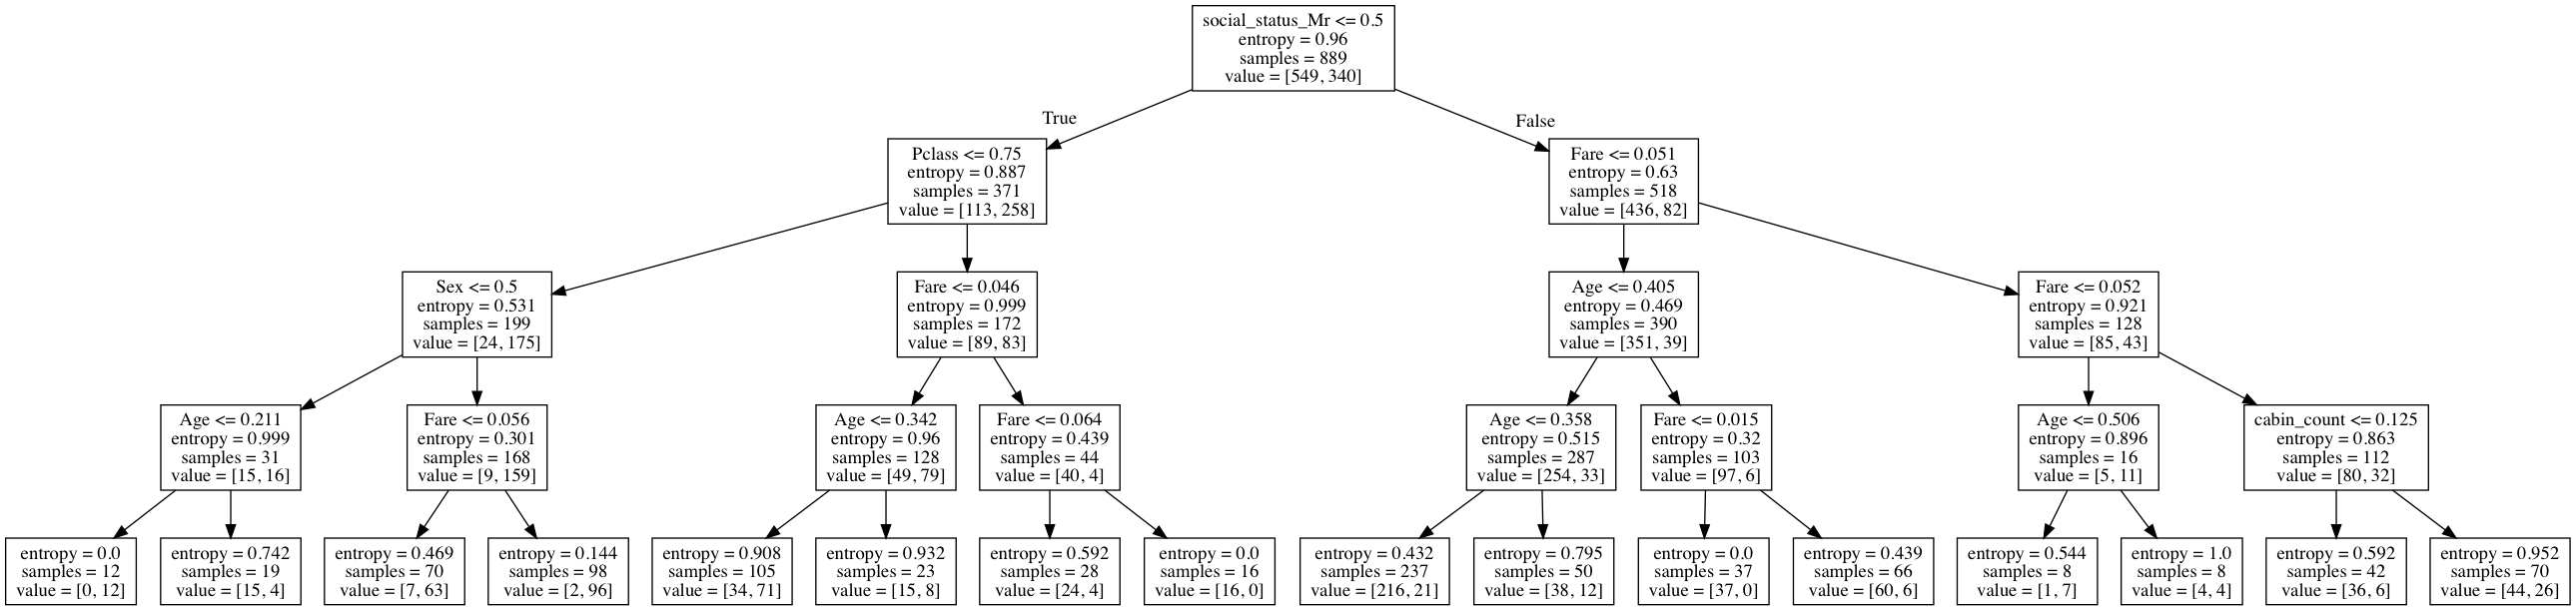

In [65]:
import pydotplus
from sklearn.externals.six import StringIO
from sklearn import tree

dot_data = StringIO()
tree.export_graphviz(best_tree, out_file=dot_data, feature_names=column_names) 

graph = pydotplus.pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("titanic.png")
from IPython.core.display import Image 
Image(filename='titanic.png')

In [66]:
len(test_id), len(best_tree.predict(X_test))

(418, 418)

In [67]:
test_id.dtype="int"

In [72]:
clf = estimator_results[0].best_estimator_

result = np.concatenate( (test_id.reshape(-1,1),
                 clf.predict(X_test).reshape(-1,1)  ) , axis=1)
df_submssion =pd.DataFrame(result, columns=["PassengerId","Survived"],dtype=int)
df_submssion.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [73]:
df_submssion.to_csv("submission_result.csv",index=False)


In [74]:
!pip install kaggle

You are using pip version 9.0.3, however version 10.0.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [76]:
!kaggle competitions submit -c titanic -f submission_result.csv -m "My submission message"

Successfully submitted to Titanic: Machine Learning from Disaster